# 1. 이미지 데이터에 라벨링, 벡터화하기

## train data path

In [1]:
import os
import numpy as np
from numpy import array
TRAIN_DIR = 'D:/MNIST/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
train_folder_list

array(['0_zero', '1_one', '2_two', '3_three', '4_four', '5_five', '6_six',
       '7_seven', '8_eight', '9_nine'], dtype='<U7')

## path 라벨링

In [2]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()  # LabelEncoder Class 호출
integer_encoded = label_encoder.fit_transform(train_folder_list)
integer_encoded

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## 라벨링 벡터화

In [3]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('integer_encoded:\n', integer_encoded)
print('onehot_encoded:\n', onehot_encoded)

integer_encoded:
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
onehot_encoded:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
type(onehot_encoded)

numpy.ndarray

## 이미지를 불러와서 흑백으로 벡터화 및 라벨링

In [5]:
import cv2
train_input = []
train_label = []
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # cv2.imread: paht경로에 있는 이미지를 흑백으로 불러옴
        train_input.append([np.array(img)])
        train_label.append([np.array(onehot_encoded[index])])

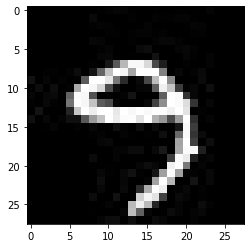

In [6]:
# 마지막 이미지 시각화
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img, cmap='gray')

## list형태를 np.array형태(42000,784)로 reshape

In [7]:
len(train_input) #train_input은 [[img],[img],...,[img]] 이런 형태

42000

In [8]:
train_input = np.reshape(train_input, (-1, 784))
# 이때 -1은 정확한 개수를 모를때 사용. -1대신 42000 넣어도 상관x
train_label = np.reshape(train_label, (-1, 10))
train_input = np.array(train_input).astype(np.float32)
train_label = np.array(train_label).astype(np.float32)

#데이터 섞기
tmp = [[x,y] for x, y in zip(train_input, train_label)]
np.random.shuffle(tmp)
train_input = np.array([n[0] for n in tmp])
train_label = np.array([n[1] for n in tmp])

np.save("train_data.npy", train_input)
np.save("train_label.npy", train_label)
print('train_input.shape: ', train_input.shape)
print('train_label.shape: ', train_label.shape)

train_input.shape:  (42000, 784)
train_label.shape:  (42000, 10)


## test 이미지 데이터(200개) 숫자 변환 전체코드

In [9]:
TEST_DIR = 'D:/MNIST/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
 
test_input = []
test_label = []
 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_folder_list)
 
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
 
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        test_input.append([np.array(img)])
        test_label.append([np.array(onehot_encoded[index])])
 
test_input = np.reshape(test_input, (-1, 784))
test_label = np.reshape(test_label, (-1, 10))
test_input = np.array(test_input).astype(np.float32)
test_label = np.array(test_label).astype(np.float32)

#데이터 섞기
tmp = [[x,y] for x, y in zip(test_input, test_label)]
np.random.shuffle(tmp)
test_input = np.array([n[0] for n in tmp])
test_label = np.array([n[1] for n in tmp])

np.save("test_input.npy",test_input)
np.save("test_label.npy",test_label)

C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# 2. 소프트맥스 회귀를 이용한 MNIST 숫자 분류기 구현

## 전체코드

In [139]:
import tensorflow as tf

In [140]:
# 입력값과 출력값을 받기 위한 플레이스홀더를 정의
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [141]:
# 변수들을 설정하고 Softmax Regression 모델을 정의
W = tf.Variable(tf.zeros(shape=[784, 10]))
b = tf.Variable(tf.zeros(shape=[10]))
logits = tf.matmul(x, W) + b
#y_pred = tf.nn.softmax(logits)

In [142]:
# cross-entropy 손실 함수 정의
#loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), reduction_indices=[1]))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)) 
# tf.nn.softmax_cross_entropy_with_logits API를 이용한 구현
# reduction_indices : The old (deprecated) name for axis

In [143]:
# GradientDescentOptimizer 정의, Learning late는 0.5 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [144]:
# 세션을 열고 변수들에 초기값을 할당
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [145]:
# mini-batch로 만들고 1000번의 최적화를 수행
batch_size = 100
for i in range(1000):
        start = ((i+1) * batch_size) - batch_size
        # 데이터를 분할하기 위해 start라는 변수를 선언
        # i는 0에서 419까지 변함
        # i = 0일 때 start에 저장되는 값은 (0+1)*100)-100이므로 0이 저장
        end = ((i+1) * batch_size)
        # 데이터를 분할하기 위해 end라는 변수를 선언
        # i = 0일 때 emd에 저장되는 값은 (0+1)*100)이므로 100이 저장
        batch_xs = train_input[start:end]
        batch_ys = train_label[start:end]
        feed_dict = {x: batch_xs, y: batch_ys}
        c, _ = sess.run([loss, train_step], feed_dict=feed_dict)
print(c)

nan


In [146]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
# 전체 test 데이터 중 실제로 맞춘 개수가 몇개인지 측정한 다음 correct_prediction에 저장
# tf.argmax : 원소 중에서 가장 큰 값의 인덱스를 반환. 
# 즉, logits에서는 가중치 업데이트 후 가장 큰 값을 갖는 인덱스를 
# y에서는 0과1 중 1인 것을 찾아서 라벨을 매기기 위함
# tf.equal : 예측 값과 정답이 같으면 True 아니면 False값이 반환
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# tf.cast : correct_prediction을 float형으로 변환. True = 1, False = 0
# 변환한 값의 평균을 구하여 accuracy에 저장. 200개 중 몇 개 맞췄는지
print('Accuracy:', sess.run(accuracy, feed_dict={x: test_input, y: test_label}))

Accuracy: 0.85
